170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - accuracy: 0.4321 - loss: 2.7772 - val_accuracy: 0.5574 - val_loss: 1.9235
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.6454 - loss: 1.6411 - val_accuracy: 0.5473 - val_loss: 2.0904
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7061 - loss: 1.4282 - val_accuracy: 0.7095 - val_loss: 1.4466
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7335 - loss: 1.3749 - val_accuracy: 0.7466 - val_loss: 1.3676
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7416 - loss: 1.3668 - val_accuracy: 0.7576 - val_loss: 1.3430
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7605 - loss: 1.3453 - val_accuracy: 0.7340 - val_loss: 1.4108
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7662 - loss: 1.3184 - val_accuracy: 0.7250 - val_loss: 1.4688
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7710 - loss: 1.3166 - val_accura

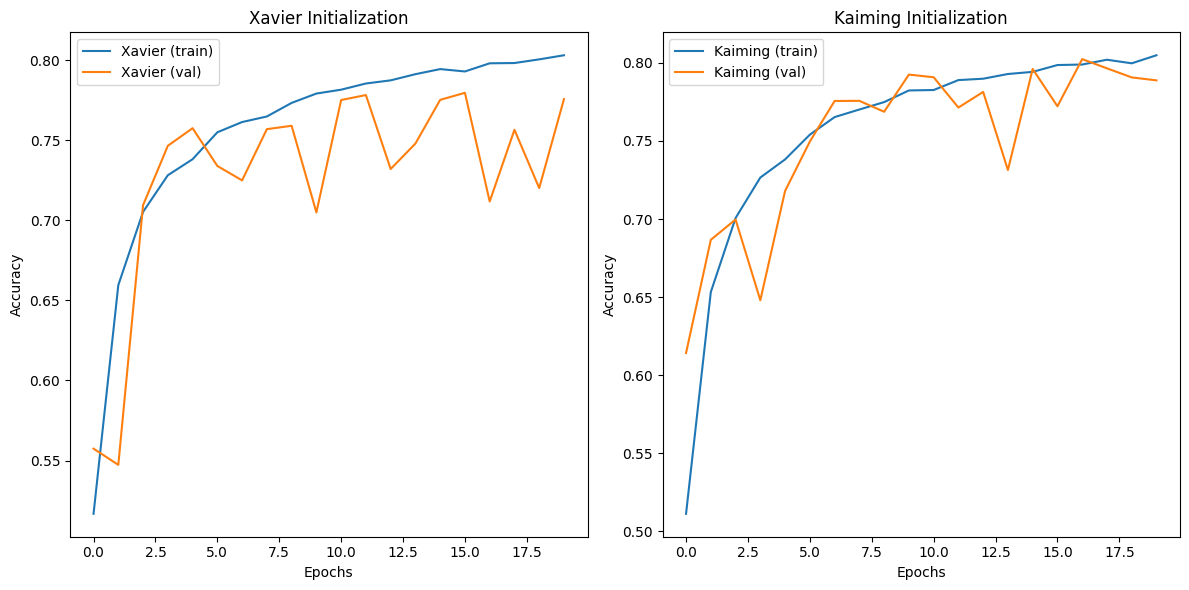

Xavier Model - Test Loss: 1.2525, Test Accuracy: 0.7758
Kaiming Model - Test Loss: 1.2413, Test Accuracy: 0.7888


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess CIFAR-10 dataset

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Step 2: Define the Neural Network Architecture
def create_model(initializer, dropout_rate=0.0, l2_regularizer=None):
    model = models.Sequential([
        # Convolutional layers for better feature extraction
        layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer=initializer,
                      kernel_regularizer=l2_regularizer, padding='same', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer=initializer,
                      kernel_regularizer=l2_regularizer, padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(dropout_rate),

        layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer=initializer,
                      kernel_regularizer=l2_regularizer, padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer=initializer,
                      kernel_regularizer=l2_regularizer, padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(dropout_rate),

        layers.Flatten(),
        layers.Dense(512, activation='relu', kernel_initializer=initializer,
                     kernel_regularizer=l2_regularizer),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Step 3: Choose Weight Initialization Techniques
xavier_initializer = initializers.GlorotNormal()
kaiming_initializer = initializers.HeNormal()

# Step 4: Create and Compile Models
xavier_model = create_model(xavier_initializer, dropout_rate=0.3,
                           l2_regularizer=tf.keras.regularizers.l2(0.001))
kaiming_model = create_model(kaiming_initializer, dropout_rate=0.3,
                            l2_regularizer=tf.keras.regularizers.l2(0.001))

xavier_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

kaiming_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Step 5: Train the Models
batch_size = 64
epochs = 20

xavier_history = xavier_model.fit(train_images, train_labels,
                                 batch_size=batch_size, epochs=epochs,
                                 validation_data=(test_images, test_labels),
                                 verbose=1)

kaiming_history = kaiming_model.fit(train_images, train_labels,
                                   batch_size=batch_size, epochs=epochs,
                                   validation_data=(test_images, test_labels),
                                   verbose=1)

# Step 6: Evaluate and Visualize Performance
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(xavier_history.history['accuracy'], label='Xavier (train)')
plt.plot(xavier_history.history['val_accuracy'], label='Xavier (val)')
plt.title('Xavier Initialization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(kaiming_history.history['accuracy'], label='Kaiming (train)')
plt.plot(kaiming_history.history['val_accuracy'], label='Kaiming (val)')
plt.title('Kaiming Initialization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Step 7: Evaluate Models on Test Data
xavier_test_loss, xavier_test_acc = xavier_model.evaluate(test_images, test_labels, verbose=0)
kaiming_test_loss, kaiming_test_acc = kaiming_model.evaluate(test_images, test_labels, verbose=0)

print(f"Xavier Model - Test Loss: {xavier_test_loss:.4f}, Test Accuracy: {xavier_test_acc:.4f}")
print(f"Kaiming Model - Test Loss: {kaiming_test_loss:.4f}, Test Accuracy: {kaiming_test_acc:.4f}")